# CRIM Intervals:  Modules

### Reminders:

#### Import Music Files

* If you are exploring pieces from CRIM, importing simply involves providing the CRIM URL of the MEI file:  
    * **`piece = importScore('https://crimproject.org/mei/CRIM_Model_0008.mei')`**

* But you can also use the Notebook with any MEI, MusicXML, or MIDI file of your own. You can easily do this when you run the Notebooks on Jupyter Hub, you will also find a folder called **`Music_Files`**.  Upload the file here, then provide the path to that file: 
    * **`piece = importScore('Music_Files/My_File_Name.mei')`**.  

#### Save outputs as CSV or Excel

* The Jupyter Hub version of these Notebooks also provides a folder called **`saved_csv`**.  You can save **csv** files of any data frame there with this command: 
    * **`notebook_data_frame_name.to_csv('saved_csv/your_file_title.csv')`**.
* If you prefer **Excel** documents (which are better for anything with a complex set of columns or hierarhical index), use **ExcelWriter**.  In the following code, you will need to provide these commands:
    * **`writer = pd.ExcelWriter('saved_csv/file_name.xlsx', engine='xlsxwriter')`**
* Now convert your dataframe to Excel
    * **`frame_name.to_excel(writer, sheet_name='Sheet1')`**
* And finally save the new file to the folder here in the Notebook:
    * **`writer.save()`**

Put the following code to a new cell and update the frame_name and file_name:

`writer = pd.ExcelWriter('saved_csv/file_name.xlsx', engine='xlsxwriter')` <br>
`frame_name.to_excel(writer, sheet_name='Sheet1')` <br>
`writer.save()` <br>


## A. Import Intervals and Other Code

* The first step is to import all the code required for the Notebook
* **`arrow/run`** or **`Shift + Enter`** in the following cell:

In [3]:
import intervals
from intervals import * 
from intervals import main_objs
import intervals.visualizations as viz
import pandas as pd
import re
import altair as alt 
from ipywidgets import interact
from pandas.io.json import json_normalize
from pyvis.network import Network
from IPython.display import display
import requests
import os

MYDIR = ("saved_csv")
CHECK_FOLDER = os.path.isdir(MYDIR)

# If folder doesn't exist, then create it.
if not CHECK_FOLDER:
    os.makedirs(MYDIR)
    print("created folder : ", MYDIR)

else:
    print(MYDIR, "folder already exists.")

saved_csv folder already exists.


## B. Importing a Group of Pieces

### B.1 Import Pieces

#### list the pieces by Piece ID only!

In [4]:
url = 'https://crimproject.org/mei/'
piece_list = ['CRIM_Mass_0005_1',
            'CRIM_Mass_0005_2',
            'CRIM_Mass_0005_3',
            'CRIM_Mass_0005_4',
            'CRIM_Mass_0005_5',
            'CRIM_Model_0008']
suff = '.mei'

### B.2 get Melodic Ngrams for all pieces

- Saves them as 'mel_ngrams_combined'

In [6]:


mel_ngrams_combined = pd.DataFrame()
for work in piece_list:
    file = f"{url}{work}{suff}"
    piece = importScore(file)
    mel = piece.getMelodic(kind="d", compound=True)
    ngrams = piece.getNgrams(df=mel, n=5)
    melodies = ngrams.stack()
    m_counts = melodies.value_counts()
    df = pd.DataFrame(m_counts)
    df.columns = [work]
    mel_ngrams_combined = pd.merge(mel_ngrams_combined,
                df,
                left_index=True,
               right_index=True,
                how='outer')
    

Memoized piece detected.
Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_2.mei


mei.base: WARNING: Importing <slur> without @startid and @endid is not yet supported.


Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_3.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_4.mei
Successfully imported https://crimproject.org/mei/CRIM_Mass_0005_5.mei
Successfully imported https://crimproject.org/mei/CRIM_Model_0008.mei


In [19]:
mel_ngrams_combined.fillna('', inplace=True)
mel_ngrams_combined.head()

,CRIM_Mass_0005_1,CRIM_Mass_0005_2,CRIM_Mass_0005_3,CRIM_Mass_0005_4,CRIM_Mass_0005_5,CRIM_Model_0008
"-2, -2, -2, -2, -2",7.0,9.0,40.0,10.0,6.0,4.0
"-2, -2, -2, -2, -3",1.0,,1.0,,,4.0
"-2, -2, -2, -2, 1",,1.0,5.0,1.0,1.0,4.0
"-2, -2, -2, -2, 2",1.0,18.0,15.0,14.0,8.0,7.0
"-2, -2, -2, -2, 3",2.0,,5.0,2.0,1.0,1.0


### B.3 get Harmonic Ngrams for all pieces

- Saves them as 'har_ngrams_combined'

In [7]:
har_ngrams_combined = pd.DataFrame()
for work in piece_list:
    file = f"{url}{work}{suff}"
    piece = importScore(file)
    har = piece.getHarmonic(kind="d", compound=True)
    ngrams = piece.getNgrams(df=har, n=5)
    harmonies = ngrams.stack()
    h_counts = harmonies.value_counts()
    df = pd.DataFrame(h_counts)
    df.columns = [work]
    har_ngrams_combined = pd.merge(har_ngrams_combined,
                df,
                left_index=True,
               right_index=True,
                how='outer')

Memoized piece detected.
Memoized piece detected.
Memoized piece detected.
Memoized piece detected.
Memoized piece detected.
Memoized piece detected.


In [17]:
har_ngrams_combined.fillna('', inplace=True)
har_ngrams_combined.head()

,CRIM_Mass_0005_1,CRIM_Mass_0005_2,CRIM_Mass_0005_3,CRIM_Mass_0005_4,CRIM_Mass_0005_5,CRIM_Model_0008
"-2, -3, -2, 1, 2",,,1.0,,,
"-2, -3, -2, 3, 3",,,1.0,,,2.0
"-2, -3, -3, -3, -2",,1.0,,,,
"-2, -3, -3, -4, -4",,,,1.0,,
"-2, -3, -3, -4, -5",,,1.0,,,


### B.4 get Modules  for all pieces

- Saves them as 'modules_combined'

In [11]:
suff = '.mei'
modules_combined = pd.DataFrame()
for work in piece_list:
    file = f"{url}{work}{suff}"
    piece = importScore(file)
    piece_har = piece.getHarmonic(kind="d", compound=False)
    ngrams = piece.getNgrams(df=piece_har, n=3, how='modules', exclude=['Rest'])
    modules = ngrams.stack()
    mod_counts = modules.value_counts()
    df = pd.DataFrame(mod_counts)
    df.columns = [work]
    modules_combined = pd.merge(modules_combined,
                df,
                left_index=True,
               right_index=True,
                how='outer')
    

Memoized piece detected.
Memoized piece detected.
Memoized piece detected.
Memoized piece detected.
Memoized piece detected.
Memoized piece detected.


In [16]:
modules_combined.fillna('', inplace=True)
modules_combined.head()

,CRIM_Mass_0005_1,CRIM_Mass_0005_2,CRIM_Mass_0005_3,CRIM_Mass_0005_4,CRIM_Mass_0005_5,CRIM_Model_0008
"-2_-2, -3_-2, -2",,,1.0,,,
"-2_-2, 1_-2, 2",,,1.0,,,
"-2_-2, 1_-2, 3",1.0,1.0,1.0,,,2.0
"-2_-2, 1_2, 4",,1.0,,,,
"-2_-2, 1_Held, 2",,,,,,1.0


###  Filter any of the above

- will need to use the appropraite name of the file:
    - `modules_combined`
    - `har_ngrams_combined`
    - `mel_ngrams_combined`

In [36]:
my_module = ['4, 1, 2, 2, -3']
filter_df = mel_ngrams_combined[mel_ngrams_combined.index.isin(my_module)]
filter_df

,CRIM_Mass_0005_1,CRIM_Mass_0005_2,CRIM_Mass_0005_3,CRIM_Mass_0005_4,CRIM_Mass_0005_5,CRIM_Model_0008
"4, 1, 2, 2, -3",5.0,,3.0,,2.0,5.0


In [22]:
cols = modules_combined.columns.values.tolist()
cols

['CRIM_Mass_0005_1',
 'CRIM_Mass_0005_2',
 'CRIM_Mass_0005_3',
 'CRIM_Mass_0005_4',
 'CRIM_Mass_0005_5',
 'CRIM_Model_0008']

In [24]:
import networkx as nx
G = nx.Graph()

In [33]:
G = nx.from_pandas_edgelist(modules_combined, 'CRIM_Mass_0005_2', 'CRIM_Model_0008')


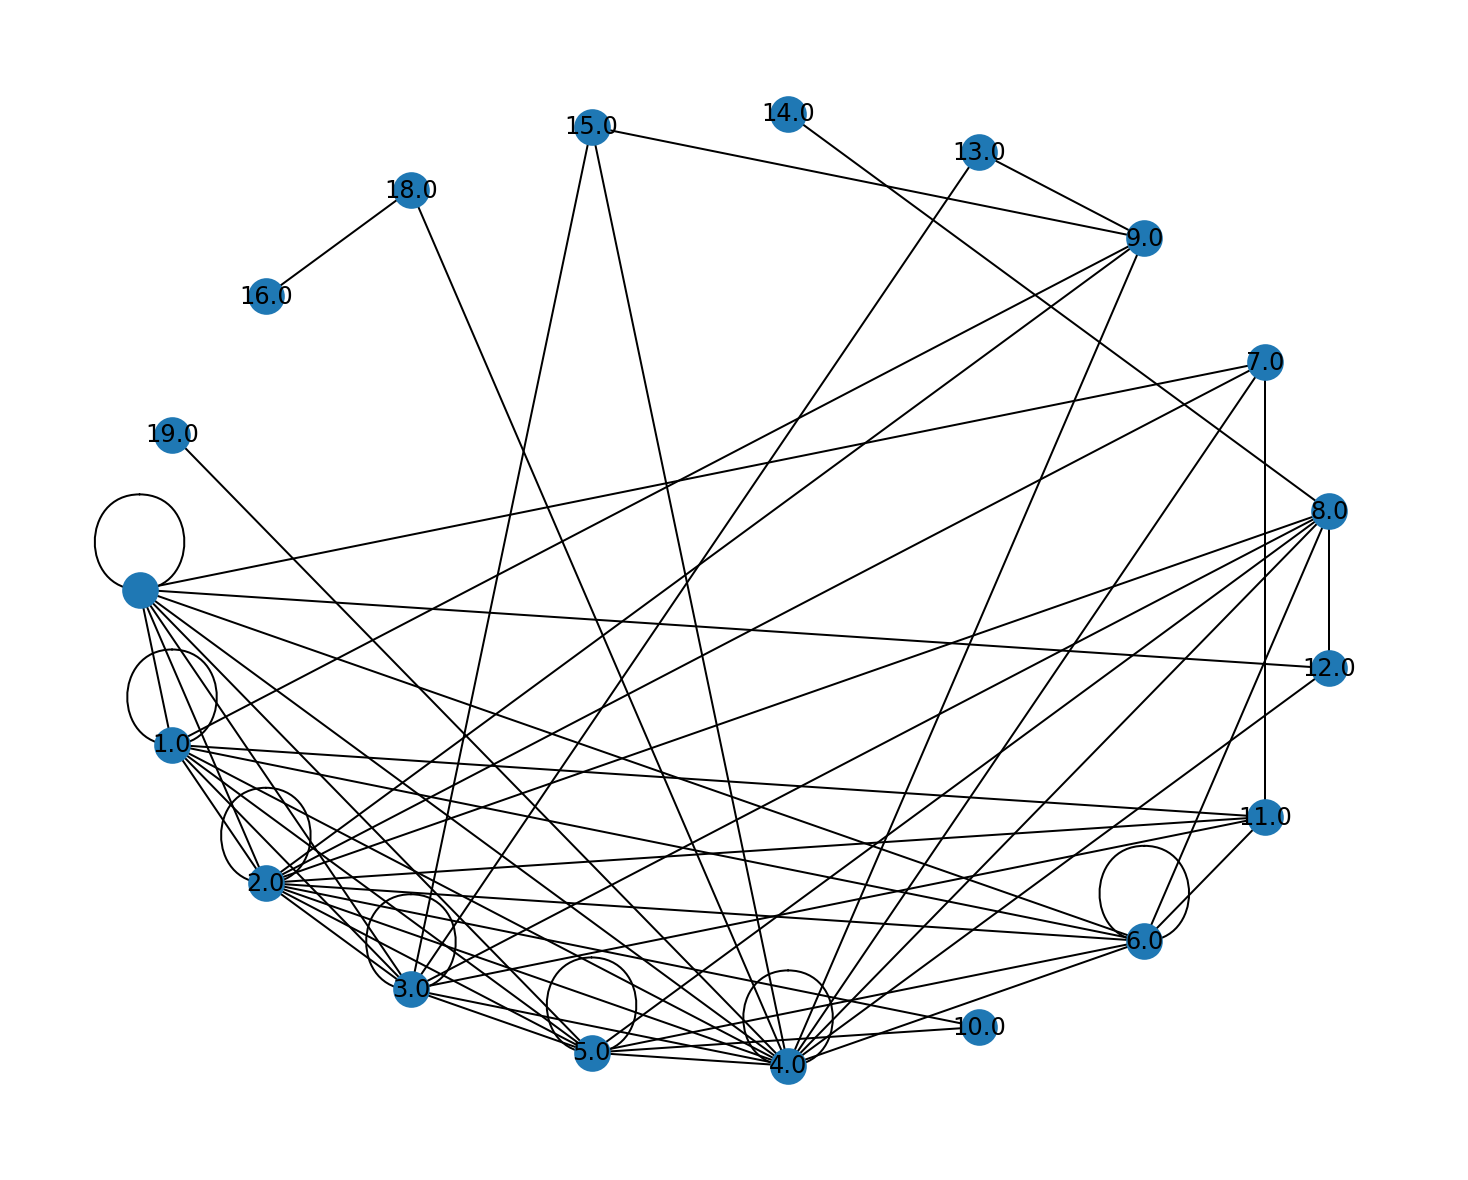

In [34]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

### D.  Inventory of Cadences Found:  One or Many Pieces at Once

* Here you can report an inventory of cadences by **type** and **tone** (and **evaded** status)


* To search multiple pieces at once (each returning its own dataframe of results):  enter the urls, separated by commas (each url within **single quotation marks**, and separated from the previous by a **comma** ).  Thus:

* **`corpus = CorpusBase(['https://crimproject.org/mei/CRIM_Model_0019.mei', 'https://crimproject.org/mei/CRIM_Model_0010.mei'])`**

In [39]:
pieces = ['https://crimproject.org/mei/CRIM_Mass_0005_1.mei',
          'https://crimproject.org/mei/CRIM_Mass_0005_2.mei',
          'https://crimproject.org/mei/CRIM_Mass_0005_3.mei',
          'https://crimproject.org/mei/CRIM_Mass_0005_4.mei',
          'https://crimproject.org/mei/CRIM_Mass_0005_5.mei',
          'https://crimproject.org/mei/CRIM_Model_0008.mei']
corpus = CorpusBase(pieces)
list_of_dfs = corpus.batch(ImportedPiece.classifyCadences, metadata=False)
combined_df = pd.concat(list_of_dfs, ignore_index=False)
summary = combined_df.groupby(['CadType', 'Tone', 'Evaded']).size().reset_index(name='counts')
summary


Memoized piece detected.
Memoized piece detected.
Memoized piece detected.
Memoized piece detected.
Memoized piece detected.
Memoized piece detected.


,CadType,Tone,Evaded,counts
0,Altizans Only,A,False,1
1,Authentic,C,False,23
2,Authentic,C,True,2
3,Authentic,D,False,1
4,Authentic,F,True,2
5,Authentic,G,False,2
6,Authentic,G,True,1
7,Clausula Vera,B,True,3
8,Clausula Vera,C,False,36
9,Clausula Vera,C,True,3


#### A simpler summary, without tone or evaded status:

In [41]:
list_of_dfs = corpus.batch(ImportedPiece.classifyCadences, metadata=False)
combined_df = pd.concat(list_of_dfs, ignore_index=True)
# Get the number of each type of cadence observed:
cadTypeCounts = combined_df['CadType'].value_counts()
print(cadTypeCounts)
# Get the number of cadences per Beat level:
cadBeatCounts = combined_df['Beat'].value_counts()
print(cadBeatCounts)

Clausula Vera    86
Authentic        31
Phrygian         22
Altizans Only     1
Name: CadType, dtype: int64
1.0    117
3.0     33
2.0      1
4.0      1
Name: Beat, dtype: int64
